# Day 5 of Data Science Training by `Mr. Harshit Dawar`!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **If outlier is corresponding to one column only then it is termed as `Univariate` Outlier**
- **If outlier is corresponding to more than one column only then it is termed as `Multivariate` Outlier**

## Identifying and Deleting Outliers

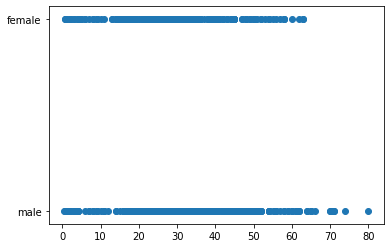

In [4]:
# Through scatter Plot
plt.scatter(data["Age"], data["Sex"])

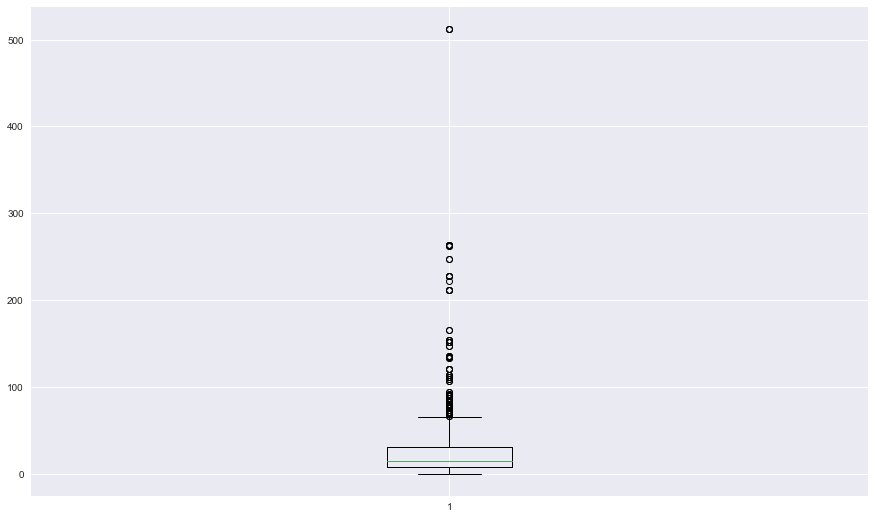

In [17]:
# Through Box plot
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize =(15,9))

ax.boxplot(data["Fare"])
plt.show()

In [14]:
# Through z-score

z_score = (data["Age"] - data["Age"].mean()) / data["Age"].std()

In [15]:
z_score

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, dtype: float64

In [16]:
data.shape

(891, 12)

In [19]:
data[z_score < 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
891 - 712

179

## Data Exploration

### Analyzing Individual Quantities/Categories

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [27]:
data["Fare"].nunique()

248

In [28]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Skewness: measure the asymmetry of a distribution. 
* In normal distribution skewness is 0.

In [29]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

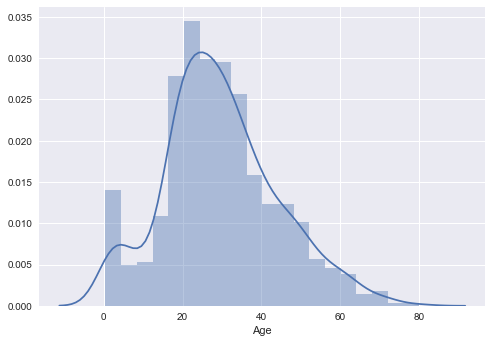

In [33]:
sns.distplot(data["Age"])

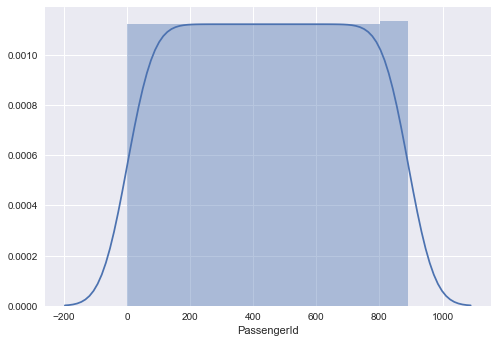

In [34]:
sns.distplot(data["PassengerId"])

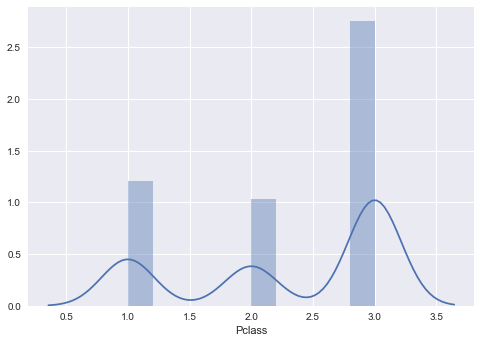

In [35]:
sns.distplot(data["Pclass"])

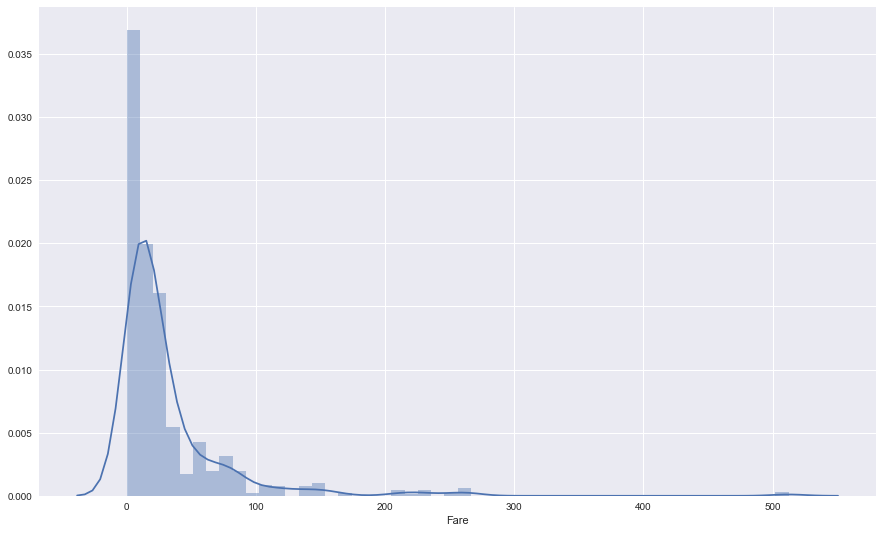

In [37]:
plt.figure(figsize = (15,9))
sns.distplot(data["Fare"])

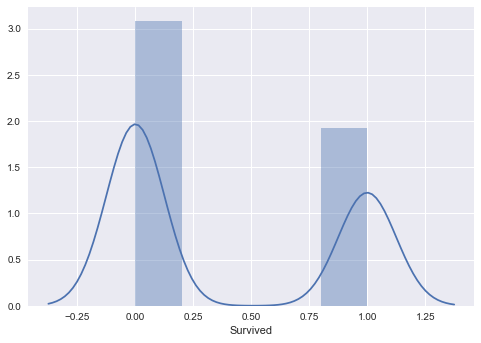

In [38]:
sns.distplot(data["Survived"])

### Exploring Categorical Quantities

In [39]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
data.groupby(["Sex", "Ticket"]).describe()  

PassengerId                                                \
                         count        mean         std    min     25%    50%   
Sex    Ticket                                                                  
female 110152              3.0  507.666667  251.010624  258.0  381.50  505.0   
       110413              2.0  572.500000   19.091883  559.0  565.75  572.5   
       110813              1.0  367.000000         NaN  367.0  367.00  367.0   
       111361              2.0  427.000000  137.178716  330.0  378.50  427.0   
       112053              1.0  888.000000         NaN  888.0  888.00  888.0   
...                        ...         ...         ...    ...     ...    ...   
male   W./C. 6607          1.0  784.000000         NaN  784.0  784.00  784.0   
       W./C. 6608          1.0   87.000000         NaN   87.0   87.00   87.0   
       W.E.P. 5734         1.0   93.000000         NaN   93.0   93.00   93.0   
       W/C 14208           1.0  220.000000         NaN  220.0  220.00  220.0   
       WE/P 5735           1.0  746.000000         NaN  746.0  746.00  746.0   

                                  Survived       ... Parch       Fare  \
                       75%    max    count mean  ...   75%  max count   
Sex    Ticket                                    ...                    
female 110152       632.50  760.0      3.0  1.0  ...  0.00  0.0   3.0   
       110413       579.25  586.0      2.0  1.0  ...  1.75  2.0   2.0   
       110813       367.00  367.0      1.0  1.0  ...  0.00  0.0   1.0   
       111361       475.50  524.0      2.0  1.0  ...  1.00  1.0   2.0   
       112053       888.00  888.0      1.0  1.0  ...  0.00  0.0   1.0   
...                    ...    ...      ...  ...  ...   ...  ...   ...   
male   W./C. 6607   784.00  784.0      1.0  0.0  ...  2.00  2.0   1.0   
       W./C. 6608    87.00   87.0      1.0  0.0  ...  3.00  3.0   1.0   
       W.E.P. 5734   93.00   93.0      1.0  0.0  ...  0.00  0.0   1.0   
       W/C 14208    220.00  220.0      1.0  0.0  ...  0.00  0.0   1.0   
       WE/P 5735    746.00  746.0      1.0  0.0  ...  1.00  1.0   1.0   

                                                                               
                       mean  std      min      25%      50%      75%      max  
Sex    Ticket                                                                  
female 110152       86.5000  0.0  86.5000  86.5000  86.5000  86.5000  86.5000  
       110413       79.6500  0.0  79.6500  79.6500  79.6500  79.6500  79.6500  
       110813       75.2500  NaN  75.2500  75.2500  75.2500  75.2500  75.2500  
       111361       57.9792  0.0  57.9792  57.9792  57.9792  57.9792  57.9792  
       112053       30.0000  NaN  30.0000  30.0000  30.0000  30.0000  30.0000  
...                     ...  ...      ...      ...      ...      ...      ...  
male   W./C. 6607   23.4500  NaN  23.4500  23.4500  23.4500  23.4500  23.4500  
       W./C. 6608   34.3750  NaN  34.3750  34.3750  34.3750  34.3750  34.3750  
       W.E.P. 5734  61.1750  NaN  61.1750  61.1750  61.1750  61.1750  61.1750  
       W/C 14208    10.5000  NaN  10.5000  10.5000  10.5000  10.5000  10.5000  
       WE/P 5735    71.0000  NaN  71.0000  71.0000  71.0000  71.0000  71.0000  

[766 rows x 56 columns]

In [45]:
data.groupby(["Sex"]).size()  

Sex
female    314
male      577
dtype: int64

In [46]:
data.groupby(["Embarked"]).size()  

Embarked
C    168
Q     77
S    644
dtype: int64

In [51]:
data.groupby(["Embarked", "Sex", "Pclass"]).size()  

Embarked  Sex     Pclass
C         female  1          43
                  2           7
                  3          23
          male    1          42
                  2          10
                  3          43
Q         female  1           1
                  2           2
                  3          33
          male    1           1
                  2           1
                  3          39
S         female  1          48
                  2          67
                  3          88
          male    1          79
                  2          97
                  3         265
dtype: int64

In [52]:
data.groupby(["Embarked", "Sex", "Pclass"]).size().unstack()

Pclass            1   2    3
Embarked Sex                
C        female  43   7   23
         male    42  10   43
Q        female   1   2   33
         male     1   1   39
S        female  48  67   88
         male    79  97  265

## Exploring Numerical Quantities

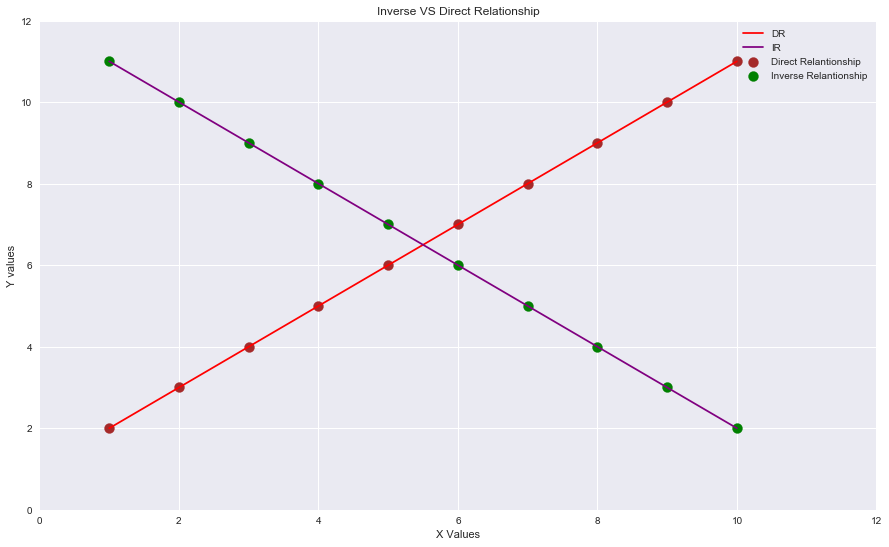

In [71]:
## Through Scatter Plot

fig, ax = plt.subplots(figsize = (15,9))

ax.scatter(np.arange(1, 11, 1),
           np.arange(2, 12, 1),
           s = 100,
           label = "Direct Relantionship",
           c = "Brown",
           cmap = "magma"
          )

ax.plot(np.arange(1, 11, 1),
       np.arange(2, 12, 1),
        c = "red",
        label = "DR"
       )


ax.scatter(np.arange(1, 11, 1),
           np.arange(11, 1, -1),
           s = 100,
           label = "Inverse Relantionship",
            c = "Green", 
           cmap = "inferno"
          )

ax.plot(np.arange(1, 11, 1),
       np.arange(11, 1, -1),
        c = "purple",
        label = "IR"
       )

ax.legend()

ax.set(ylim = (0, 12),
       xlim = (0,12),
      xlabel = "X Values",
       ylabel = "Y values",
       title = "Inverse VS Direct Relationship"
      )

plt.show()

## Binning Numerical Data
* It divides the data into custom intervals!

In [72]:
data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [79]:
# Dividing data into intervals

grouped_data = pd.DataFrame(pd.cut(data["Age"], bins = [0, 15, 30, 45, 60 , 75 ,90 ]))

In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
grouped_data

,Age
0,"(15.0, 30.0]"
1,"(30.0, 45.0]"
2,"(15.0, 30.0]"
3,"(30.0, 45.0]"
4,"(30.0, 45.0]"
...,...
886,"(15.0, 30.0]"
887,"(15.0, 30.0]"
888,NaN
889,"(15.0, 30.0]"


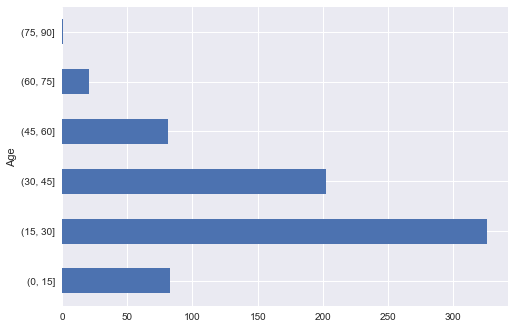

In [87]:
grouped_data.groupby("Age").size().plot(kind="barh")
plt.show()

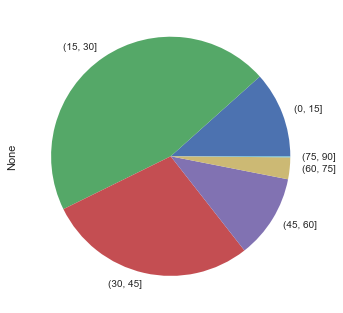

In [89]:
grouped_data.groupby("Age").size().plot(kind = "pie")
plt.show()

## Using Correlation

In [90]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [92]:
data.corrwith(data["Age"])

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
dtype: float64

## Visualizing Power of Seaborn Libary

<Figure size 720x504 with 0 Axes>

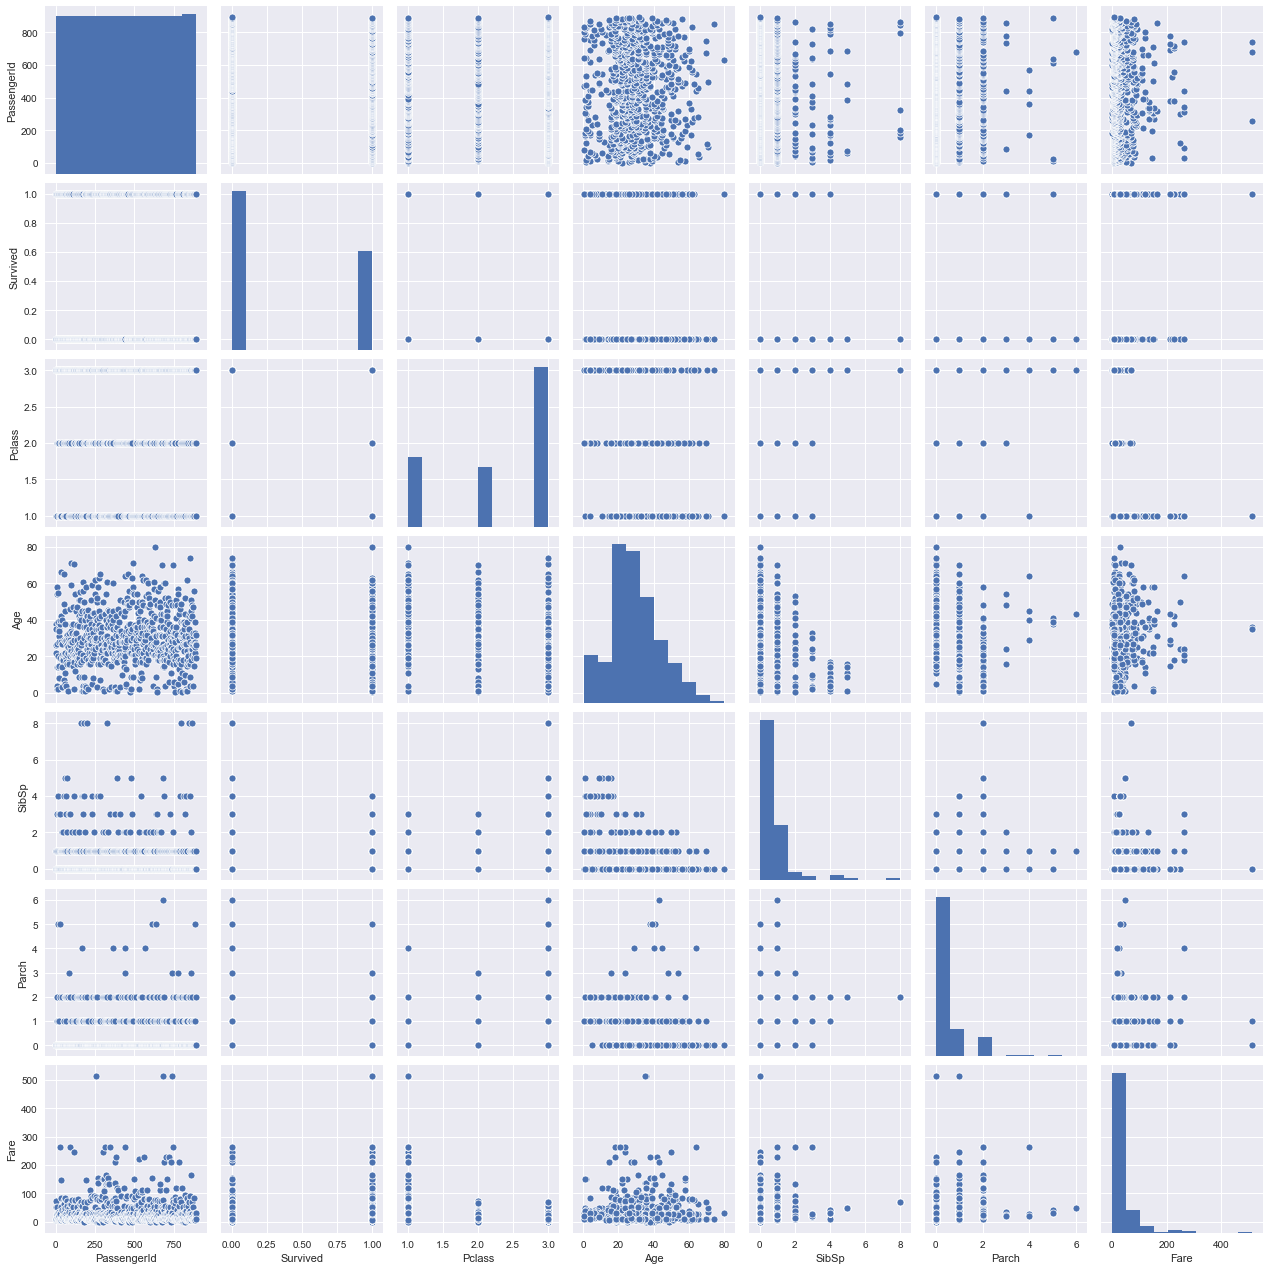

In [95]:
plt.figure(figsize=(10,7))
sns.pairplot(data)
plt.show()

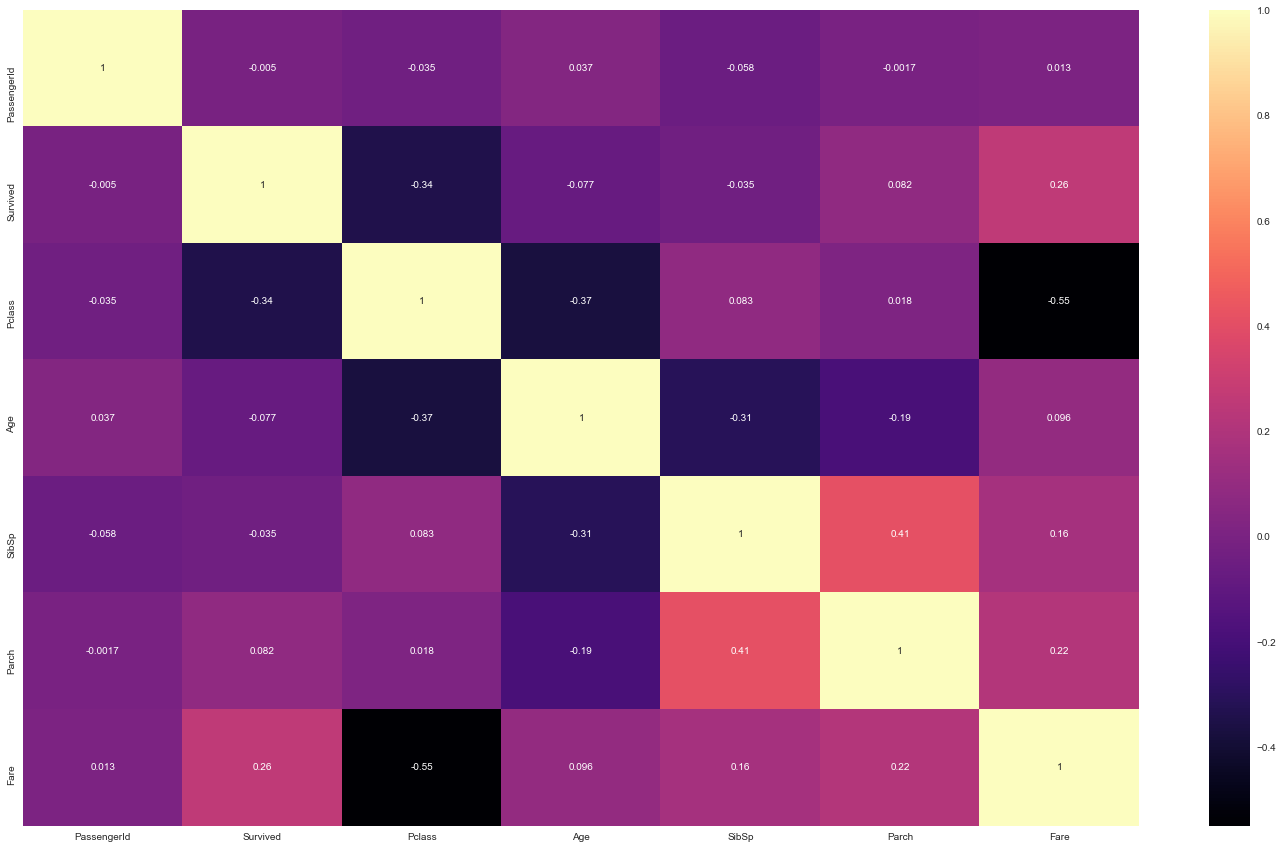

In [101]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot = True, cmap = "magma" )
plt.show()

# I hope you understood well and enjoyed!